## INA219  
The INA219 is a current shunt and power monitor with programmable conversion times and filtering.  

Manufacturer link: http://www.ti.com/product/INA219  

Breakout board used: https://www.adafruit.com/product/904

In [1]:
import matplotlib.pyplot as plt

from meerkat.ina219 import INA219
from meerkat import base, parser, tools

In [2]:
# bus number 1 on Raspberry Pi
dev = INA219(bus_n=1, bus_addr=0x40, output='csv')

In [3]:
dev.verbose = True

#### Configuration

In [4]:
# reset all configuration settings
dev.reset()

Writing to 'config' registry # 0
HEX value: 0xb99f
Binary value:
1011100110011111
1111110000000000
5432109876543210


#### Measurement

For this example, device is connected to a Raspberry Pi 3 5V supply.

In [5]:
dev.get_shunt_voltage()

0.65532

In [6]:
dev.get_bus_voltage()

0.892

In [7]:
dev.get_current_simple()

6.5535

#### Calibration

Calibration Register enables the user to scale the Current Register and Power Register to the most useful value for a given application.  Refer to the datasheet for details

In [8]:
dev.set_calibration(10240)
base.time.sleep(0.1)

Writing to 'calibration' registry # 5
HEX value: 0x2800
Binary value:
0010100000000000
1111110000000000
5432109876543210


In [9]:
# confirm calibration value
dev.get_calibration()

10240

In [10]:
dev.get_shunt_voltage()

0.65532

In [11]:
dev.get_bus_voltage()

0.888

In [12]:
# simple return, just float
dev.get_current_simple()

6.553299999999999

In [13]:
# get method, list with description and sample number
dev.get(description='test_1', n=5)

[['test_1', 1, 0.888, 6.5535],
 ['test_1', 2, 0.888, 6.553299999999999],
 ['test_1', 3, 0.888, 6.553299999999999],
 ['test_1', 4, 0.888, 6.553299999999999],
 ['test_1', 5, 0.888, 6.553299999999999]]

#### JSON Data Publishing

In [14]:
# writer method with description and sample number
dev.write(description='test_2', n=5)

#### CSV Writer Output

In [16]:
dev.csv_writer.path

'2020_01_20_15_26_20_data.csv'

In [17]:
# load .csv data written with dev.write
m, df = parser.csv_resource(dev.csv_writer.path)

In [18]:
df.head()

,std_time_ms,description,sample_n,voltage,current,datetime64_ns
0,2020-01-20 15:26:20.028397,test_2,0,0.892,6.5532,2020-01-20 15:26:20.028397
1,2020-01-20 15:26:20.031822,test_2,1,0.892,6.5533,2020-01-20 15:26:20.031822
2,2020-01-20 15:26:20.035298,test_2,2,0.888,6.5532,2020-01-20 15:26:20.035298
3,2020-01-20 15:26:20.046996,test_2,3,0.892,6.5533,2020-01-20 15:26:20.046996
4,2020-01-20 15:26:20.050824,test_2,4,0.888,6.5532,2020-01-20 15:26:20.050824


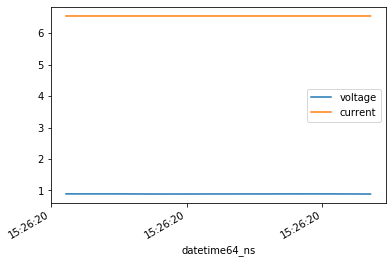

In [19]:
df.datetime64_ns = df.datetime64_ns.dt.tz_localize('UTC')  # Pandas 0.24.1 hack
df[["datetime64_ns", "voltage", "current"]].plot(x="datetime64_ns");

In [20]:
m

{'name': 'INA219',
 'title': None,
 'description': None,
 'format': None,
 'encoding': 'utf-8',
 'bytes': None,
 'hash': None,
 'schema': None,
 'sources': None,
 'licenses': None,
 'line_terminator': '\n',
 'quote_char': '"',
 'double_quote': True,
 'escape_char': '\\',
 'null_sequence': 'NA',
 'comment': '#',
 'skip_lines': 1,
 'path': '2020_01_20_15_26_20_data.csv',
 'device': {'name': 'INA219',
  'version_hw': '1.0',
  'version_sw': '1.0',
  'accuracy': None,
  'precision': '12bit',
  'bus': '<meerkat.i2c_pi.WrapI2C object at 0xad01e9f0>',
  'state': None,
  'active': None,
  'error': None,
  'dtype': None,
  'description': 'Texas Instruments Bidirectional Current Monitor',
  'urls': 'www.ti.com/product/ADS1115',
  'manufacturer': 'Texas Instruments',
  'calibration_date': None,
  'bus_voltage_range': 32,
  'gain': 8,
  'gain_string': '+/- 320 mV',
  'bus_adc_resolution': 12,
  'bus_adc_averaging': None,
  'shunt_adc_resolution': 12,
  'shunt_adc_averaging': None,
  'mode': 7,
  'm

#### JSON Writer Output

In [21]:
# writing method with description and sample number
dev.publish(description='test_4', n=5)

['{"description": "test_4", "sample_n": 0, "voltage": 0.888, "current": 6.5531999999999995, "std_time_ms": "2020-01-20 15:27:09.692849"}',
 '{"description": "test_4", "sample_n": 1, "voltage": 0.884, "current": 6.5531999999999995, "std_time_ms": "2020-01-20 15:27:09.696351"}',
 '{"description": "test_4", "sample_n": 2, "voltage": 0.888, "current": 6.5535, "std_time_ms": "2020-01-20 15:27:09.699429"}',
 '{"description": "test_4", "sample_n": 3, "voltage": 0.888, "current": 6.5534, "std_time_ms": "2020-01-20 15:27:09.702428"}',
 '{"description": "test_4", "sample_n": 4, "voltage": 0.888, "current": 6.5531999999999995, "std_time_ms": "2020-01-20 15:27:09.705462"}']